In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/PonyPricer/
%matplotlib inline
%run scrape2sql.py

import re
import math
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import linear_model
from sklearn import isotonic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from model import *

/Users/jbrosamer/PonyPricer
opening /Users/jbrosamer/PonyPricer/WarmbloodData/WarmbloodId0To1000.p
opening /Users/jbrosamer/PonyPricer/WarmbloodData/WarmbloodId1000To2000.p
opening /Users/jbrosamer/PonyPricer/WarmbloodData/WarmbloodId2000To3000.p
{'lnprice': 'REAL', 'warmblood': 'BOOLEAN', 'temp': 'INTEGER', 'zip': 'VARCHAR(50)', 'color': 'VARCHAR(50)', 'gender': 'VARCHAR(50)', 'age': 'REAL', 'breed': 'VARCHAR(50)', 'registered': 'VARCHAR(50)', 'id': 'INTEGER', 'skills': 'VARCHAR(50)', 'inches': 'VARCHAR(50)', 'sold': 'BOOLEAN', 'forlease': 'BOOLEAN', 'forsale': 'VARCHAR(50)', 'soldhere': 'BOOLEAN', 'price': 'REAL'}
DressageAds

/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/pandas/core/generic.py:1003: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  dtype=dtype)
/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere', u'forsale', u'forlease',
       u'registered', u'skills', u'gender', u'inches', u'lnprice'],
      dtype='object')
Abs Median Error: 3673.99551642
Abs Percent Error: 0.46156904455
Mean RMSE: 11462.9143581


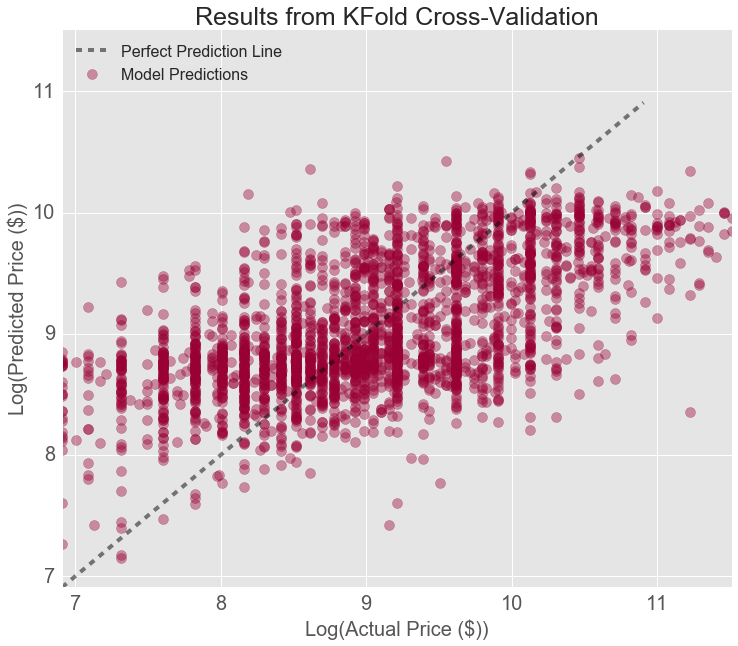

In [7]:
df_test = all_data()
df = df_test.copy()
df = clean_col(df)
df = encode(df)
params_gbr = {'loss': 'ls'}
b = Model(df, params = params_gbr)
b.split()
b.kfold_cv(n_folds=10)
b.plot_results()


ValueError: could not convert string to float: Mare

In [ ]:
gbr=b.makeModel()
importances = gbr.feature_importances_
# std = np.std([tree.feature_importances_ for tree in gbr.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(b.X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
featNames=['age', 'gender', 'inches', 'color', 'breed']
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
xvals=range(b.X.shape[1])
plt.bar(range(b.X.shape[1]), importances[indices],
       color="r", align="center")
xlbl=["%i: %s"%(x, featNames[x]) for x in indices]

plt.xticks(range(b.X.shape[1]), xlbl)
plt.xlim([-1, b.X.shape[1]])
plt.show()

In [13]:
from categories import breeds
diff=set(breeds)-set(df_test['breed'].value_counts().index)
print diff

set(['National Foundation Quarter Horse NFQHA', 'Sugarbush Draft Horse', 'American Brindle Equine Association', 'Nokota', 'Riding Steer', 'Australian Stock Horse', 'Goat', 'American Indian Horse Registry', 'Argentine Criollo Horse', 'Black Forest Horse', 'Half Arabian Horse', 'Budyonny Horse', 'American Cream Draft', 'Nez Perce Horse', 'American Sulphur Horse', 'Miniature Donkey', 'Hessen', 'Australian Warmblood', 'Pintabian', 'Thoroughbred Welsh Cross', 'Kentucky Mountain Horse', 'Andalusian Cross', 'Blazer Horse', 'American Show Pony', 'Oberlander Draft Horse', 'Walkaloosa', 'Pintaloosa', 'Mammoth Mule', 'Draft Horse Cross', 'American Creme and White Albino', 'International Buckskin IBHA', 'Zebra', 'Brabant Horse', 'Hinnie', 'Arabian Horse', 'Pleasure Saddle Horse Registry', 'New Zealand Warmblood', 'American Gaited Endurance Horse', 'Virginia Highlander', 'AQHA Quarter Horse Cross', 'Appalachian Singlefoot', 'Zorse', 'United Mountain Horse', 'Galiceno', 'Mangalarga Marchador', 'Zonk

In [14]:
df_test['breed'].value_counts()

Thoroughbred                              1024
Oldenburg                                  283
Unknown                                    225
AQHA Quarter Horse                         223
Hanoverian                                 216
Andalusian                                 210
Friesian                                   204
Dutch Warmblood                            174
APHA Paint                                 132
Morgan Horse                                89
AQHA Quarter Horse Appendix                 82
Draft Horse                                 78
Welsh Pony                                  69
Holsteiner                                  66
Trakehner                                   66
Pony                                        53
Appaloosa                                   53
Rheinland Pfalz Saar                        48
Lusitano                                    47
Arabian Cross                               45
Warmblood Cross                             44
Irish Sport H

In [ ]:

plt.style.use('ggplot')
df = df_test.copy()
df = clean_col(df)
idx = df.loc[df['price']>100000,:].index
#df = df.drop(idx, axis = 0)
df_temp = df[['age','inches', 'gender', 'lnprice']]
plot = sns.pairplot(df_temp, hue = 'gender', diag_kind='kde')
for ax in plot.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
pr=df_test.groupby(['breed'])['price']

In [ ]:
pr[0]